# Polynomial Regression

Polynomial Regression is a type of regression analysis used to model relationships between variables when the relationship is not linear but can be approximated by a polynomial function. 

While simple linear regression models relationships using a straight line, polynomial regression uses higher-degree polynomial functions to capture more complex and nonlinear relationships between the independent and dependent variables.

### EDA on Position_Salaries dataset 

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# Check the dimensions of dataset

df.shape

(10, 3)

In [4]:
# Check data types of each column

df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [5]:
# Check for missing values

df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

There are no null values in the dataset

In [6]:
# Check for duplicate values

df.duplicated().sum()

0

There are no duplicate values in the dataset

In [7]:
# Calculate summary statistics

df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
df.describe(include= 'O')

,Position
count,10
unique,10
top,Business Analyst
freq,1


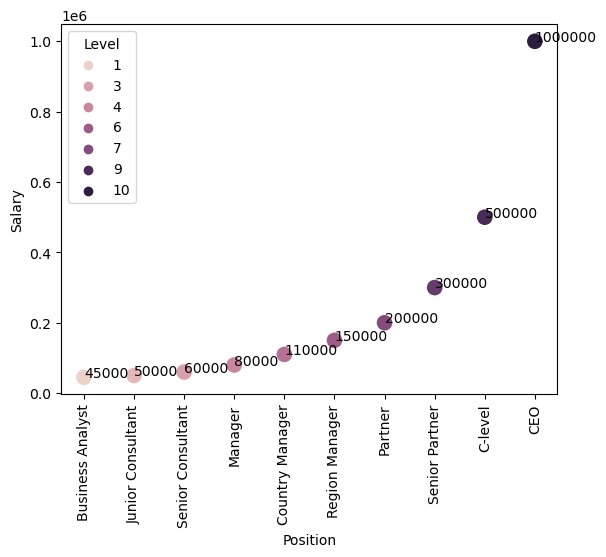

In [9]:
# Visualizing the relationship between the variables using scatter plot

sns.scatterplot(data=df, x="Position", y="Salary", hue="Level", s= 150)
plt.xticks(rotation=90)
for i in range(len(df)):
    plt.text(df['Position'][i], df['Salary'][i], df['Salary'][i])
plt.show()

### Building the Polynomial Regression Model

In [10]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [11]:
# Importing the necessary libraries to build a model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

In [13]:
# Model Fitting

poly_reg = PolynomialFeatures(degree = 4)
X_train_poly = poly_reg.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [14]:
# Model Prediction

X_test_poly = poly_reg.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)
print(y_pred)

[550738.27849056  30679.16278174 139190.58942538]


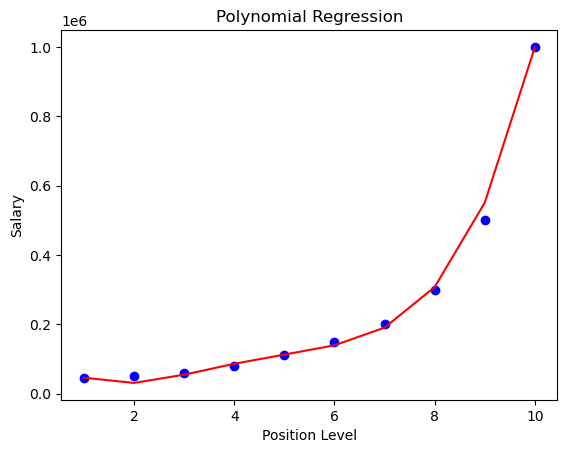

In [15]:
# Visualization

plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.transform(X)), color='red')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression')
plt.show()

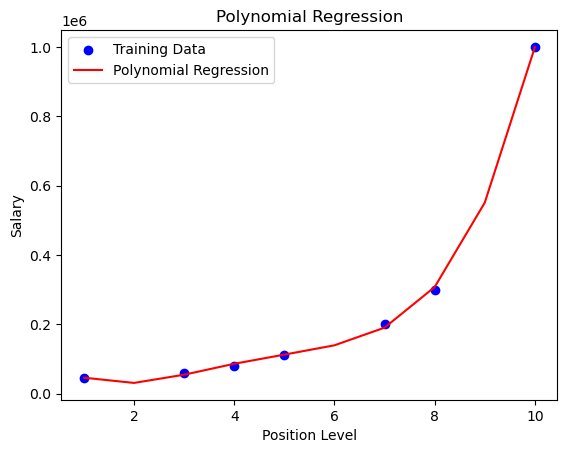

In [16]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X, lin_reg.predict(poly_reg.transform(X)), color='red', label='Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

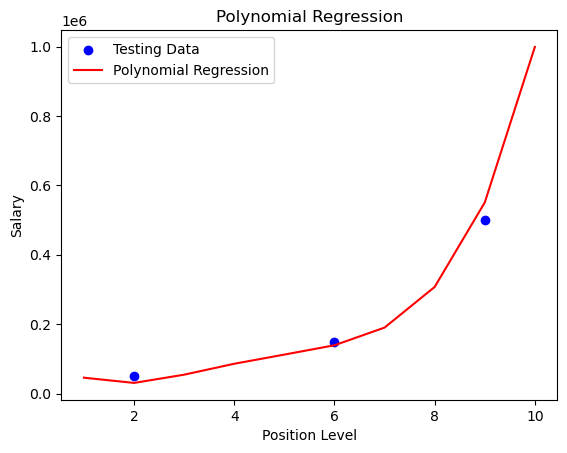

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.plot(X, lin_reg.predict(poly_reg.transform(X)), color='red', label='Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [18]:
# Comparing the results

comparision = pd.DataFrame()
comparision['Actual'] = y_test
comparision['predicted'] = y_pred
comparision

,Actual,predicted
0,500000,550738.278491
1,50000,30679.162782
2,150000,139190.589425


In [19]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error = ", mse)
print("R-squared = ", r2)

Mean Squared Error =  1021503670.6569266
R-squared =  0.9725566178032468


Therefore, 97.27% of the variability in the dependent variable ("Salary") is explained by the independent variables ("Position" and "Level") using the polynomial regression model.

In other words, the polynomial regression model explains about 97.1% of the variance in "salaries" based on the "positions" and "levels". This is a high R-squared value, suggesting that the model is fitting the data very well and is able to explain a significant amount of the variability in salaries.

In [20]:
# Predicting by giving new data

new_level = 100
new_level_poly = poly_reg.transform([[new_level]])
predicted_salary = lin_reg.predict(new_level_poly)

print("Predicted Salary for New_Level of {} is: {:.2f}" .format(new_level, predicted_salary[0]))

new_level = 50
new_level_poly = poly_reg.transform([[new_level]])
predicted_salary = lin_reg.predict(new_level_poly)

print("Predicted Salary for New_Level of {} is: {:.2f}" .format(new_level, predicted_salary[0]))

Predicted Salary for New_Level of 100 is: 64075668642.45
Predicted Salary for New_Level of 50 is: 3342749564.28


In [21]:
new_level = 11
for i in range(10):
    new_level_poly = poly_reg.transform([[new_level]])
    predicted_salary = lin_reg.predict(new_level_poly)
    print("Predicted Salary for New_Level of {} is: {:.2f}" .format(new_level, predicted_salary[0]))
    new_level += 1

Predicted Salary for New_Level of 11 is: 1749247.43
Predicted Salary for New_Level of 12 is: 2916129.29
Predicted Salary for New_Level of 13 is: 4633111.01
Predicted Salary for New_Level of 14 is: 7051787.05
Predicted Salary for New_Level of 15 is: 10342018.52
Predicted Salary for New_Level of 16 is: 14691933.10
Predicted Salary for New_Level of 17 is: 20307925.05
Predicted Salary for New_Level of 18 is: 27414655.27
Predicted Salary for New_Level of 19 is: 36255051.22
Predicted Salary for New_Level of 20 is: 47090306.99
